In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/FTML

/content/drive/MyDrive/FTML


In [ ]:
!rm -r model/*

In [ ]:
!git pull origin main

From https://github.com/Algorithmist-Girl/FTML-security-course
 * branch            main       -> FETCH_HEAD
Already up to date.


In [ ]:
!git config

In [ ]:
# add the data directory now
%cd drive/MyDrive/FTML
%ls
# !mkdir data/
%cd data

[Errno 2] No such file or directory: 'drive/MyDrive/FTML'
/content/drive/MyDrive/FTML
attacks.py               cnn_attack.py           file_utils.py    readme.md
bert_attack.py           cnn_classifier_ftml.py  ftml/            requirements.txt
bert_classifier_ftml.py  cnn_classifier.py       ftml_final_env/  synonym_selector.py
bert_classifier.py       cnn_model.py            LICENSE          tokenization.py
bert_model.py            cnn_utils.py            model/
bert_utils.py            data/                   optimization.py
build_embs.py            data_utils.py           __pycache__/
/content/drive/MyDrive/FTML/data


In [ ]:
%cd /content/drive/MyDrive/FTML
%ls

/content/drive/MyDrive/FTML
attacks.py               cnn_attack.py           file_utils.py    readme.md
bert_attack.py           cnn_classifier_ftml.py  ftml/            requirements.txt
bert_classifier_ftml.py  cnn_classifier.py       ftml_final_env/  synonym_selector.py
bert_classifier.py       cnn_model.py            LICENSE          tokenization.py
bert_model.py            cnn_utils.py            model/
bert_utils.py            data/                   optimization.py
build_embs.py            data_utils.py           __pycache__/


## Regular training, without FTML

In [ ]:
%rm -r model/
!python cnn_classifier.py --data_dir data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-nt --do_train --do_eval --max_seq_length 512 --num_train_epochs 5

2024-12-05 10:25:54.653103: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 10:25:54.670689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 10:25:54.691718: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 10:25:54.698201: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 10:25:54.713684: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
# # %cd data/
# # %ls
# # %cd aux_files
# # %ls
# %cd ..
# %cd ..
# %ls

/content/drive/MyDrive/FTML/data
/content/drive/MyDrive/FTML
attacks.py               cnn_attack.py           file_utils.py    readme.md
bert_attack.py           cnn_classifier_ftml.py  ftml/            requirements.txt
bert_classifier_ftml.py  cnn_classifier.py       ftml_final_env/  synonym_selector.py
bert_classifier.py       cnn_model.py            LICENSE          tokenization.py
bert_model.py            cnn_utils.py            model/
bert_utils.py            data/                   optimization.py
build_embs.py            data_utils.py           __pycache__/


In [ ]:
!python cnn_attack.py --data_dir ./data/ --task_name imdb --model_type CNNModel --attack ga --output_dir model/cnn-imdb-nt --save_to_file model/cnn-imdb-nt/attack-ga-2.txt --max_seq_length 512 --num_train_epochs 5

2024-12-05 10:29:15.004470: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 10:29:15.021736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 10:29:15.042448: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 10:29:15.048727: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 10:29:15.063451: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
import matplotlib.pyplot as plt
train_accuracies_experiment_baseline =[0.84656, 0.93096, 0.97632, 0.99524, 0.99932]
eval_accuracies_expriment_baseline= [ 0.89684, 0.89792, 0.89256,0.88708,  0.88148 pplotpl]
train_losses_experiment_baseline = [ 0.3471092988767892, 0.18099808015520005,0.07173405732492656, 0.020046882835738456, 0.005521534334259617  ]
eval_losses_experiment_baseline = [0.2509622118454807, 0.25234449812572224,  0.29274368130278833,0.35973155422478303, 0.429643361202004 ]
plt.plot([1, 2, 3, 4, 5], train_accuracies_experiment_baseline)
plt.title('Train accuracies ')

# Model Accuracy of Test Set:0.0
# Model Accuracy Before Attack:0.88
# Attack Success Rate:0.9545454545454546
# Model Accuracy After Attack:0.040000000000000036
# Average Substitution Ratio:0.0

In [ ]:
#  !python cnn_classifier.py --data_dir data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-nt --do_train --do_eval --max_seq_length 512 --num_train_epochs 2
#  python cnn_classifier.py --data_dir ./data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-nt --do_train --do_eval --max_seq_length 512 --num_train_epochs 2

In [ ]:
# %rm -r model/cnn-imdb-ftml

## With FTML

In [ ]:
# attack code portion
!rm -r model/cnn-imdb-ftml; python cnn_classifier_ftml.py --data_dir ./data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-ftml --do_train --do_eval --max_seq_length 512 --num_train_epochs 5 --beta 1.0 --alpha 6.0

rm: cannot remove 'model/cnn-imdb-ftml': No such file or directory
2024-12-05 10:32:23.821746: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 10:32:23.839685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 10:32:23.862052: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 10:32:23.868684: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024

In [ ]:
!python cnn_attack.py --data_dir ./data/ --task_name imdb --model_type CNNModel --attack ga --output_dir model/cnn-imdb-ftml --save_to_file model/cnn-imdb-ftml/attack-ga-20.txt --max_seq_length 512 --num_train_epochs 5

2024-12-05 11:51:59.333344: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 11:51:59.350815: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 11:51:59.371684: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 11:51:59.378018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 11:51:59.392823: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
import matplotlib.pyplot as plt
train_accuracies_experiment_baseline_ftml =[0.82692,0.88052,0.90048, 0.94264,  0.94956 ]
eval_accuracies_expriment_baseline_ftml = [ 0.87624, 0.88244,0.88608,  0.88876, 0.88972  ]
train_losses_experiment_baseline_ftml = [ 1.9309893634618092,0.9369343715098203, 0.603882557176568, 0.4460505076381556, 0.419555049761177 ]
eval_losses_experiment_baseline_ftml = [0.2939216456547075, 0.27465256394780413, 0.2688403029603009,  0.2638512508069374, 0.26312635283993213 ]
plt.plot([1, 2, 3], train_accuracies_experiment_baseline_ftml)
plt.title('Train accuracies ')

# Model Accuracy of Test Set:0.0
# Model Accuracy Before Attack:0.86
# Attack Success Rate:0.2558139534883721
# Model Accuracy After Attack:0.64
# Average Substitution Ratio:0.0


# Experiment 1

In [ ]:
# with fewer epochs, instead of 5. in paper going to report 5 epochs of training!!
!rm -r model/cnn-imdb-ftml; python cnn_classifier_ftml.py --data_dir ./data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-ftml --do_train --do_eval --max_seq_length 512 --num_train_epochs 3 --beta 1.0 --alpha 6.0 --experiment1

2024-12-05 07:51:55.238633: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 07:51:55.255586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 07:51:55.276321: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 07:51:55.282579: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 07:51:55.297137: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!python cnn_attack.py --data_dir ./data/ --task_name imdb --model_type CNNModel --attack ga --output_dir model/cnn-imdb-ftml --save_to_file model/cnn-imdb-ftml/attack-ga-20.txt --max_seq_length 512 --num_train_epochs 3

2024-12-05 08:39:57.630286: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 08:39:57.647650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 08:39:57.668384: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 08:39:57.674660: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 08:39:57.689732: I tensorflow/core/platform/cpu_feature_guar

Text(0.5, 1.0, 'Train accuracies ')

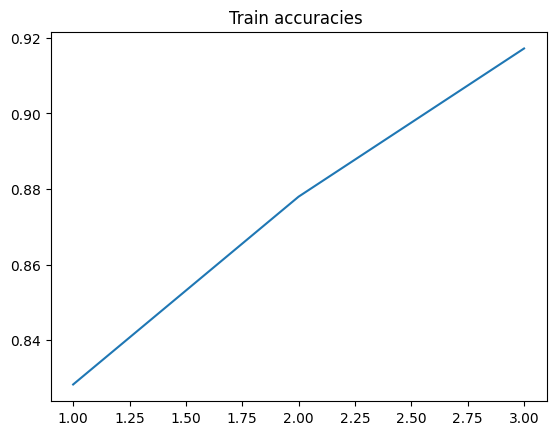

In [ ]:
import matplotlib.pyplot as plt
train_accuracies_experiment1 =[ 0.82828,0.87796,  0.91716]
eval_accuracies_experiment1 = [ 0.87488, 0.84244, 0.88424 ]
train_losses_experiment1 = [1.9152949825881997, 0.9039361781781287, 0.6326435180500035 ]
eval_losses_experiment1 = [0.29536936173633654, 0.3506460388057998, 0.272003654732692]
plt.plot([1, 2, 3], train_accuracies_experiment1)
plt.title('Train accuracies ')

# Model Accuracy Before Attack:0.8
# Attack Success Rate:0.225
# Model Accuracy After Attack:0.62

In [ ]:
!rm -r model/cnn-imdb-ftml; python cnn_classifier_ftml.py --data_dir ./data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-ftml --do_train --do_eval --max_seq_length 512 --num_train_epochs 5 --beta 1.0 --alpha 6.0 --experiment1

2024-12-06 02:35:42.219090: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 02:35:42.236949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 02:35:42.258019: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 02:35:42.264445: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 02:35:42.279571: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!python cnn_attack.py --data_dir ./data/ --task_name imdb --model_type CNNModel --attack ga --output_dir model/cnn-imdb-ftml --save_to_file model/cnn-imdb-ftml/attack-ga-20.txt --max_seq_length 512 --num_train_epochs 5

2024-12-06 03:55:07.253246: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 03:55:07.272752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 03:55:07.293805: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 03:55:07.300201: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 03:55:07.315429: I tensorflow/core/platform/cpu_feature_guar

In [ ]:

train_accuracies_experiment1  = [0.82828,0.87796, 0.90216, 0.9416, 0.94988 ]
eval_accuracies_experiment1  = [0.87488,  0.84244, 0.86052, 0.88716, 0.88648 ]
train_losses_experiment1  = [1.9152949825881997, 0.9039361781781287, 0.5709317908110216, 0.4138247950759995, 0.38942373412496906]
eval_losses_experiment1 = [ 0.29536936173633654,  0.3506460388057998, 0.32203858142376557, 0.2671682023424275,0.2681296462079092 ]


plt.plot([1, 2, 3], train_accuracies_experiment1)
plt.title('Train accuracies ')


# Experiment 2

In [ ]:
!rm -r model/cnn-imdb-ftml; python cnn_classifier_ftml.py --data_dir ./data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-ftml --do_train --do_eval --max_seq_length 512 --num_train_epochs 5 --beta 1.0 --alpha 6.0 --experiment2

2024-12-05 08:52:19.813595: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 08:52:19.831363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 08:52:19.853295: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 08:52:19.859816: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 08:52:19.875235: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!python cnn_attack.py --data_dir ./data/ --task_name imdb --model_type CNNModel --attack ga --output_dir model/cnn-imdb-ftml --save_to_file model/cnn-imdb-ftml/attack-ga-20.txt --max_seq_length 512 --num_train_epochs 5

2024-12-05 10:12:36.105949: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 10:12:36.123486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 10:12:36.145162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 10:12:36.151519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 10:12:36.166892: I tensorflow/core/platform/cpu_feature_guar

Text(0.5, 1.0, 'Train accuracies ')

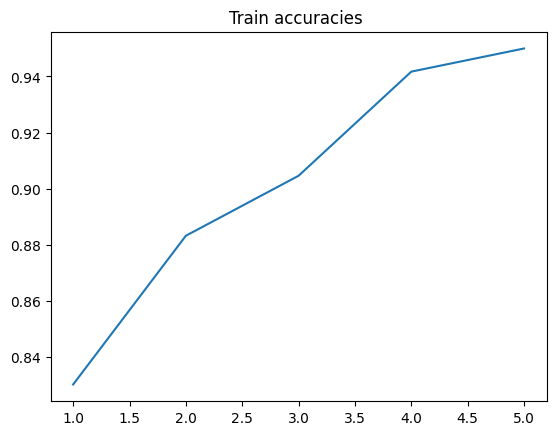

In [ ]:
import matplotlib.pyplot as plt
train_accuracies_experiment2 =[0.83032,0.88328,0.90464, 0.94172, 0.94996 ]
eval_accuracies_experiment2 = [ 0.88168, 0.84832,  0.86308, 0.8906, 0.88996 ]
train_losses_experiment2 = [ 2.178821793602556, 0.9681127400654356,  0.5918711704747451, 0.43060517814153293, 0.4044797716619414]
eval_losses_experiment2 = [0.2830395430174409, 0.34274375552729686, 0.3225569359730093,  0.2614958389301081, 0.2627087118750324]
plt.plot([1, 2, 3, 4, 5], train_accuracies_experiment2)
plt.title('Train accuracies ')

# Model Accuracy of Test Set:0.0
# Model Accuracy Before Attack:0.9
# Attack Success Rate:0.2222222222222222
# Model Accuracy After Attack:0.7
# Average Substitution Ratio:0.0

#Experiment 3

In [ ]:
!rm -r model/cnn-imdb-ftml; python cnn_classifier_ftml.py --data_dir ./data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-ftml --do_train --do_eval --max_seq_length 512 --num_train_epochs 5 --beta 1.0 --alpha 6.0 --experiment3

2024-12-05 22:36:39.787877: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 22:36:39.803389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 22:36:39.823816: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 22:36:39.830141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 22:36:39.845348: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!python cnn_attack.py --data_dir ./data/ --task_name imdb --model_type CNNModel --attack ga --output_dir model/cnn-imdb-ftml --save_to_file model/cnn-imdb-ftml/attack-ga-20.txt --max_seq_length 512 --num_train_epochs 5

2024-12-05 23:57:15.458944: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 23:57:15.476123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 23:57:15.496648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 23:57:15.502888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 23:57:15.517889: I tensorflow/core/platform/cpu_feature_guar

Text(0.5, 1.0, 'Train accuracies ')

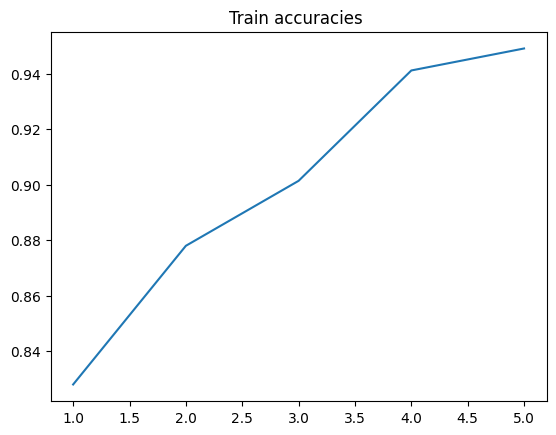

In [ ]:
import matplotlib.pyplot as plt
train_accuracies_experiment3 =[0.828, 0.87796, 0.90136, 0.94112,  0.94904]
eval_accuracies_experiment3 = [0.8736, 0.86632, 0.86632,  0.88836, 0.88716]
train_losses_experiment3 = [1.9039637556161417,0.8953856509512342,0.5679955927993331, 0.41318070884708247, 0.38879276732044754 ]
eval_losses_experiment3 = [0.2958876959675429, 0.3125755881928668,0.3125755881928668, 0.2648580227503363, 0.2666676190054538]
plt.plot([1, 2, 3, 4, 5], train_accuracies_experiment3)
plt.title('Train accuracies ')
# Model Accuracy of Test Set:0.0
# Model Accuracy Before Attack:0.86
# Attack Success Rate:0.13953488372093023
# Model Accuracy After Attack:0.74
# Average Substitution Ratio:0.0

## Experiment 4

In [ ]:
!rm -r model/cnn-imdb-ftml; python cnn_classifier_ftml.py --data_dir ./data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-ftml --do_train --do_eval --max_seq_length 512 --num_train_epochs   --beta 1.0 --alpha 6.0 --experiment4

Streaming output truncated to the last 5000 lines.
Iteration:  26% 200/782 [13:24<39:30,  4.07s/it]the device:  cuda:0

Iteration:  26% 201/782 [13:28<38:24,  3.97s/it]the device:  cuda:0

Iteration:  26% 202/782 [13:32<38:17,  3.96s/it]the device:  cuda:0

Iteration:  26% 203/782 [13:36<38:33,  4.00s/it]the device:  cuda:0

Iteration:  26% 204/782 [13:40<37:48,  3.92s/it]the device:  cuda:0

Iteration:  26% 205/782 [13:44<38:35,  4.01s/it]the device:  cuda:0

Iteration:  26% 206/782 [13:48<39:29,  4.11s/it]the device:  cuda:0

Iteration:  26% 207/782 [13:53<40:02,  4.18s/it]the device:  cuda:0

Iteration:  27% 208/782 [13:56<39:00,  4.08s/it]the device:  cuda:0

Iteration:  27% 209/782 [14:01<39:27,  4.13s/it]the device:  cuda:0

Iteration:  27% 210/782 [14:05<38:55,  4.08s/it]the device:  cuda:0

Iteration:  27% 211/782 [14:09<39:45,  4.18s/it]the device:  cuda:0

Iteration:  27% 212/782 [14:13<38:09,  4.02s/it]the device:  cuda:0

Iteration:  27% 213/782 [14:17<39:40,  4.18s/it]the 

In [ ]:
!python cnn_attack.py --data_dir ./data/ --task_name imdb --model_type CNNModel --attack ga --output_dir model/cnn-imdb-ftml --save_to_file model/cnn-imdb-ftml/attack-ga-20.txt --max_seq_length 512 --num_train_epochs 3 --experiment4

2024-12-17 08:14:45.808297: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 08:14:45.825193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 08:14:45.845877: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 08:14:45.852155: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 08:14:45.866752: I tensorflow/core/platform/cpu_feature_guar

## Experiment 5 (for the attack)

In [ ]:
!rm -r model/cnn-imdb-ftml; python cnn_classifier_ftml.py --data_dir ./data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-ftml --do_train --do_eval --max_seq_length 512 --num_train_epochs 5 --beta 1.0 --alpha 6.0

2024-12-06 05:02:46.629984: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 05:02:46.648081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 05:02:46.669352: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 05:02:46.675935: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 05:02:46.691547: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
# 12/06/2024 05:18:34 - INFO - cnn_utils -   ***** Training results *****
# 12/06/2024 05:18:34 - INFO - cnn_utils -   epoch = 0
# 12/06/2024 05:18:34 - INFO - cnn_utils -   train_accuracy

# 12/06/2024 06:21:01 - INFO - cnn_utils -   train_accuracy =
# 12/06/2024 06:21:01 - INFO - cnn_utils -   train_loss =

# 12/06/2024 06:21:14 - INFO - cnn_utils -     epoch = 4
# 12/06/2024 06:21:14 - INFO - cnn_utils -     eval_accuracy =
# 12/06/2024 06:21:14 - INFO - cnn_utils -     eval_loss =

In [ ]:
!python cnn_attack.py --data_dir ./data/ --task_name imdb --model_type CNNModel --attack ga --output_dir model/cnn-imdb-ftml --save_to_file model/cnn-imdb-ftml/attack-ga-20.txt --max_seq_length 512 --num_train_epochs 5 --experiment5

2024-12-06 06:21:18.736132: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 06:21:18.753984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 06:21:18.775375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 06:21:18.781836: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 06:21:18.797149: I tensorflow/core/platform/cpu_feature_guar

## Experiment 6

In [ ]:
# NO NEED TO RERUN THIS, SINCE RUNNING DIFFERENT ATTACKS ON THE GENERATED RESULTS HERE!!
!rm -r model/cnn-imdb-ftml; python cnn_classifier_ftml.py --data_dir ./data/ --task_name imdb --model_type CNNModel --output_dir model/cnn-imdb-ftml --do_train --do_eval --max_seq_length 512 --num_train_epochs 5 --beta 1.0 --alpha 6.0

rm: cannot remove 'model/cnn-imdb-ftml': No such file or directory
2024-12-06 07:25:06.385662: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 07:25:06.403450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 07:25:06.424928: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 07:25:06.431366: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024

In [ ]:
!python cnn_attack.py --data_dir ./data/ --task_name imdb --model_type CNNModel --attack ga --output_dir model/cnn-imdb-ftml --save_to_file model/cnn-imdb-ftml/attack-ga-20.txt --max_seq_length 512 --num_train_epochs 5 --experiment6

2024-12-06 08:54:50.076580: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 08:54:50.094396: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-06 08:54:50.115674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-06 08:54:50.122169: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 08:54:50.137638: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
# Model Accuracy of Test Set:0.0
# Model Accuracy Before Attack:0.86
# Attack Success Rate:0.0
# Model Accuracy After Attack:0.86
# Average Substitution Ratio:0.0